In [143]:
#load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#data importing
da1=pd.read_csv("StudentsPerformance.csv")
da1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [144]:
# pass mark is 40 for each paper
#creating new variables(feature engineering) using the condition

passmark=40
da1['maths status']=np.where(da1['math score']>passmark,'pass','fail')
da1['reading status']=np.where(da1['reading score']>passmark,'pass', 'fail')
da1['writing status']=np.where(da1['writing score']>passmark,'pass','fail')
da1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,maths status,reading status,writing status
0,female,group B,bachelor's degree,standard,none,72,72,74,pass,pass,pass
1,female,group C,some college,standard,completed,69,90,88,pass,pass,pass
2,female,group B,master's degree,standard,none,90,95,93,pass,pass,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,pass,pass,pass
4,male,group C,some college,standard,none,76,78,75,pass,pass,pass
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,pass,pass,pass
996,male,group C,high school,free/reduced,none,62,55,55,pass,pass,pass
997,female,group C,high school,free/reduced,completed,59,71,65,pass,pass,pass
998,female,group D,some college,standard,completed,68,78,77,pass,pass,pass


In [145]:
da1['maths status'].value_counts()

pass    950
fail     50
Name: maths status, dtype: int64

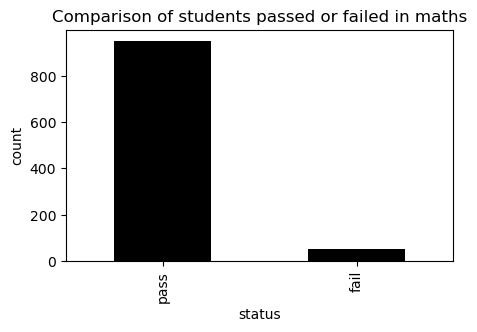

In [146]:
da1['maths status'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))
plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

<AxesSubplot:>

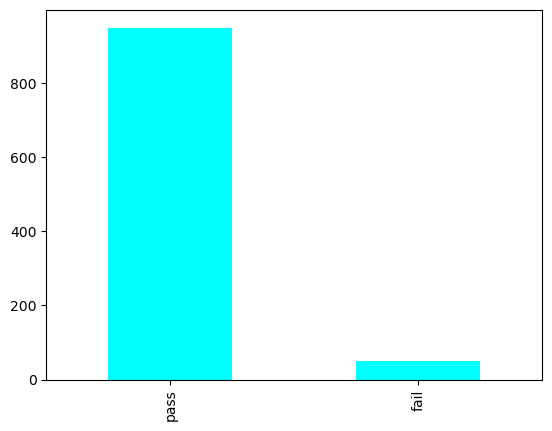

In [147]:
da1['maths status'].value_counts().plot.bar(color='cyan')

<AxesSubplot:>

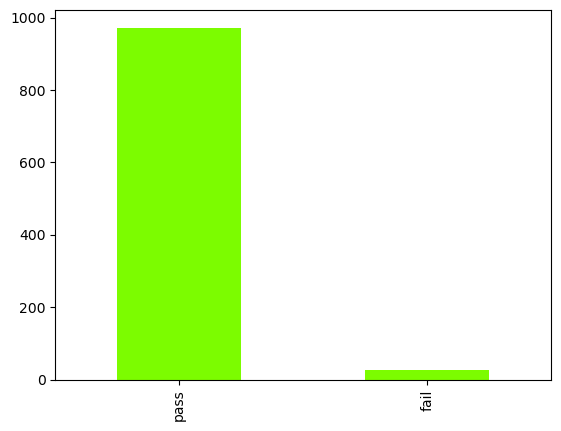

In [148]:
da1['reading status'].value_counts().plot.bar(color='lawngreen')

<AxesSubplot:>

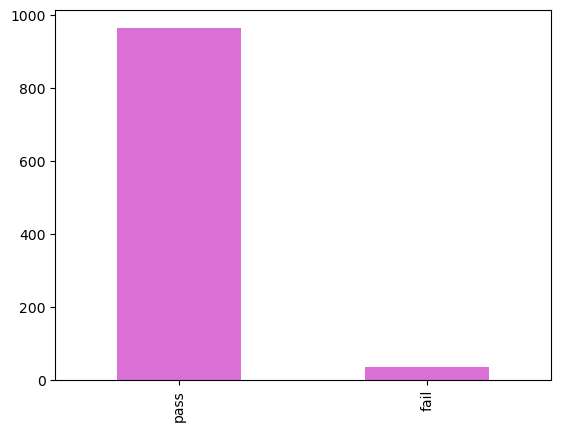

In [149]:
da1['writing status'].value_counts().plot.bar(color='orchid')

In [150]:
# computing the total score for each student

da1['total_score'] = da1['math score'] + da1['reading score'] + da1['writing score']

In [151]:
# computing percentage for each of the students
# importing math library to use ceil
from math import * 

da1['percentage'] = da1['total_score']/3
for i in range(0, 1000):
  da1['percentage'][i] = ceil(da1['percentage'][i])
da1.head(3)

C:\Users\kchri\AppData\Local\Temp\ipykernel_17848\2531363455.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da1['percentage'][i] = ceil(da1['percentage'][i])


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,maths status,reading status,writing status,total_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,pass,pass,pass,218,73.0
1,female,group C,some college,standard,completed,69,90,88,pass,pass,pass,247,83.0
2,female,group B,master's degree,standard,none,90,95,93,pass,pass,pass,278,93.0


In [152]:
#percentage
#da1['score']=(da1['math score']+da1['reading score']+da1['writing score'])/300*(100)
#da1

In [153]:
da1['status'] = da1.apply(lambda x : 'Fail' if x['maths status'] == 'Fail' or x['reading status'] == 'Fail' or x['writing status'] == 'Fail' else 'Pass', axis = 1)

In [154]:
da1.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,maths status,reading status,writing status,total_score,percentage,status
0,female,group B,bachelor's degree,standard,none,72,72,74,pass,pass,pass,218,73.0,Pass
1,female,group C,some college,standard,completed,69,90,88,pass,pass,pass,247,83.0,Pass


In [155]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade D
# 41 - 60 marks : grade C
# 60 - 70 marks : grade B
# 70 - 80 marks : grade B+
# 80 - 90 marks : grade A
# 90 - 100 marks : grade A+
#determine grade or getgrade can be used

def determine_grade(percentage, status):             
  if status == 'Fail':
    return 'D'
  if(percentage >= 90):
    return 'A+'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B+'
  if(percentage >= 60):
    return 'B'
  if(percentage >= 40):
    return 'C'
  else :
    return 'D'

da1['grades'] = da1.apply(lambda x: determine_grade(x['percentage'], x['status']), axis = 1 )

da1['grades'].value_counts()

B+    260
B     252
C     248
A     156
A+     58
D      26
Name: grades, dtype: int64

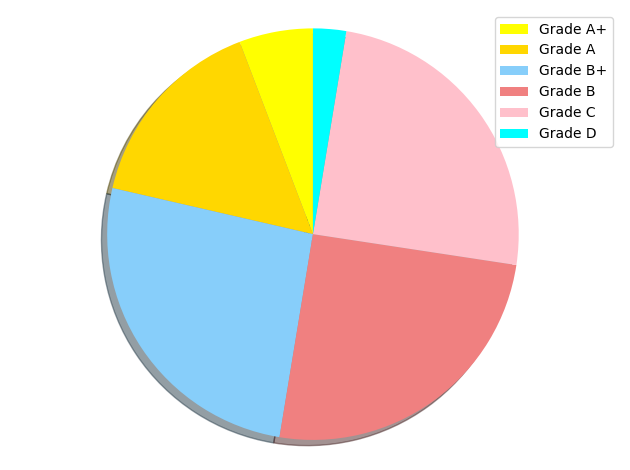

In [156]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade A+', 'Grade A', 'Grade B+', 'Grade B', 'Grade C', 'Grade D']
sizes = [58, 156, 260, 252, 248, 26]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='parental level of education'>

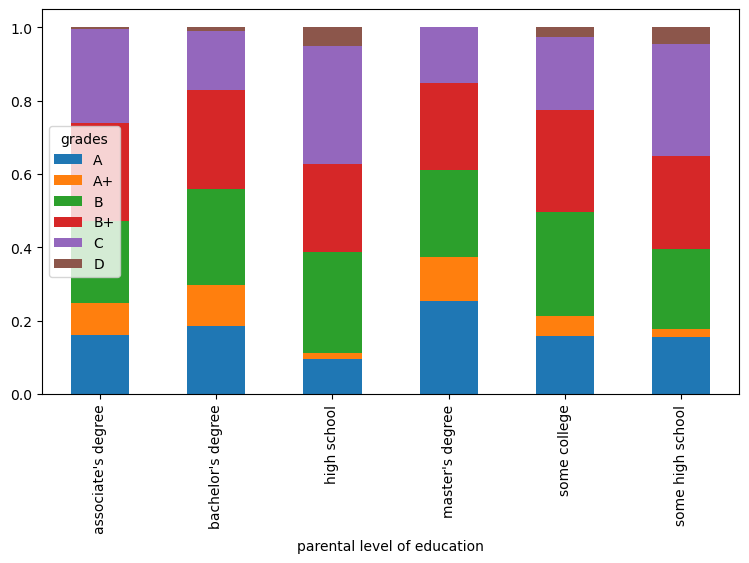

In [157]:
# comparison parent's degree and their corresponding grades

x = pd.crosstab(da1['parental level of education'], da1['grades'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (9, 5))

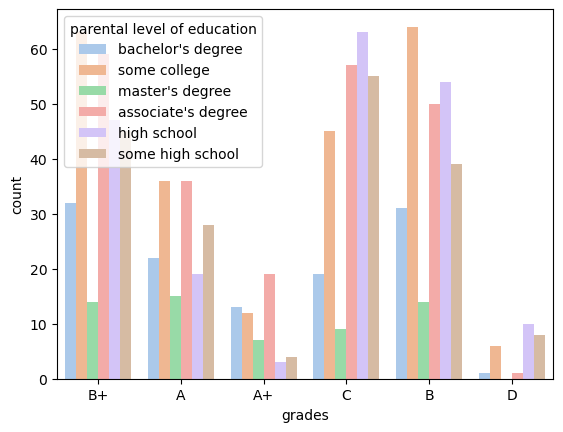

In [158]:
# for better visualization we will plot it again using seaborn

sns.countplot(x = da1['grades'], data = da1, hue = da1['parental level of education'], palette = 'pastel')
plt.show()

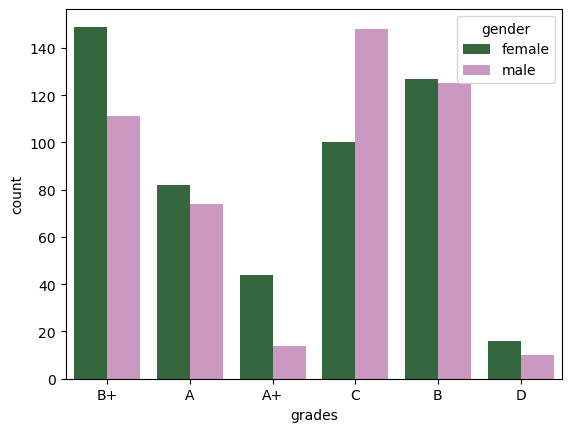

In [159]:
# comparing the distribution of grades among males and females

sns.countplot(x = da1['grades'], data = da1, hue = da1['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.show()

# Label Encoding

In [160]:
#transforming all categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [161]:
da1.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'maths status', 'reading status', 'writing status',
       'total_score', 'percentage', 'status', 'grades'],
      dtype='object')

In [162]:
da1['gender']=le.fit_transform(da1['gender'])
da1['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

In [163]:
da1['race/ethnicity']=le.fit_transform(da1['race/ethnicity'])
da1['race/ethnicity'].value_counts()

2    319
3    262
1    190
4    140
0     89
Name: race/ethnicity, dtype: int64

In [164]:
da1['maths status']=le.fit_transform(da1['maths status'])
da1['maths status'].value_counts()


1    950
0     50
Name: maths status, dtype: int64

In [165]:
da1['reading status']=le.fit_transform(da1['reading status'])
da1['reading status'].value_counts()


1    973
0     27
Name: reading status, dtype: int64

In [166]:

da1['writing status']=le.fit_transform(da1['writing status'])
da1['writing status'].value_counts()

1    965
0     35
Name: writing status, dtype: int64

In [167]:
da1['grades']=le.fit_transform(da1['grades'])
A=da1['grades'].value_counts()
A

3    260
2    252
4    248
0    156
1     58
5     26
Name: grades, dtype: int64

<AxesSubplot:ylabel='grades'>

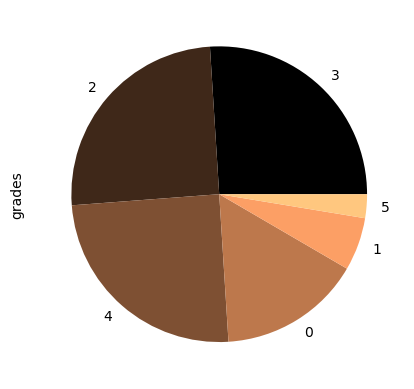

In [168]:
A.plot(kind='pie', cmap='copper')

<AxesSubplot:xlabel='grades', ylabel='count'>

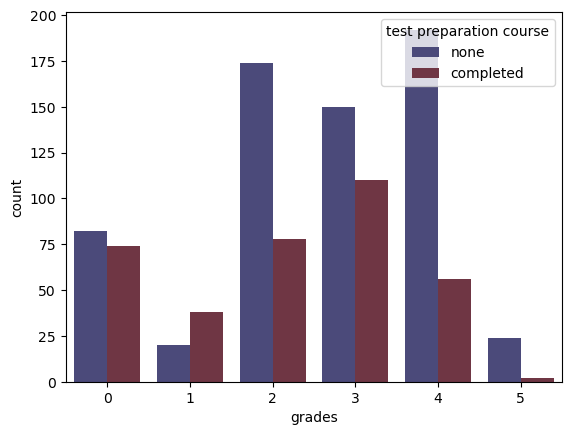

In [169]:
sns.countplot(x=da1['grades'], hue=da1['test preparation course'], palette='icefire')